#6 - Notebook that implements a Random Forest Model using Bag of Words

---

### **This notebook primarily contains code that implements a Random Forest model using Bag of Words (an NLP technique) and the dataset that was created in the 4th notebook.**
---

In this model, any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document. Hence, it is known as "bag" of words.

```
Example:

"John likes to watch movies. Mary likes movies too."

After tokenization: "John","likes","to","watch","movies","Mary","likes","movies","too"

BoW = {"John":1,"likes":2,"to":1,"watch":1,"movies":2,"Mary":1,"too":1};
```
The random forest is a classification algorithm consisting of many decisions trees. It uses the results from Bag of Words and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.


---
# Importing libraries and defining constants

In [1]:
# Imports library necessary for mounting Google Drive.
from google.colab import drive
# Mounts Google Drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Copies the model helper function python program from Google Drive to Colab Storage for use in this notebook.
!cp "drive/MyDrive/Fake News Classifier/Helper Functions/model_helperfunctions.py" .

In [3]:
# Imports all the libraries required for the notebook to run.
import pandas as pd
import numpy as np
import model_helperfunctions
import ast
import matplotlib.pyplot as plt
import nltk
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.preprocessing import LabelBinarizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus.util import LazyCorpusLoader
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [4]:
# Sets the path for the data directory and the filenames.
DATA_PATH = "/content/drive/MyDrive/Data/"
PRE_PROCESSED_DATA_FILE_NAME = 'kaggle_newsdataset_preprocessed.csv'
RANDOM_STATE = 42
pd.options.display.max_seq_items = 20
pd.options.display.max_rows = 50

# Load the data

In [5]:
df = pd.read_csv(DATA_PATH + PRE_PROCESSED_DATA_FILE_NAME, 
                 low_memory = False, 
                 usecols = ['title', 'text', 'label', 'clean_text_tokens', 'clean_title_tokens'])

In [6]:
df.clean_text_tokens = df.clean_text_tokens.map(ast.literal_eval)
df.clean_title_tokens = df.clean_title_tokens.map(ast.literal_eval)

In [7]:
df.head()

,title,text,label,clean_text_tokens,clean_title_tokens
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,fake,"[donald, trump, just, couldn, wish, all, ameri...","[donald, trump, sends, out, embarrassing, new,..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,fake,"[house, intelligence, committee, chairman, dev...","[drunk, bragging, trump, staffer, started, rus..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",fake,"[on, it, was, revealed, that, former, milwauke...","[sheriff, david, clarke, becomes, an, internet..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",fake,"[on, christmas, day, donald, trump, announced,...","[trump, is, so, obsessed, he, even, has, obama..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,fake,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, just, called, out, donald, tru..."


# Split the data

In [8]:
y = df.label
X = df.drop('label', axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                   test_size = 0.2,
                                                   random_state = RANDOM_STATE,
                                                   stratify = y)

In [10]:
X_train.shape

(30910, 4)

In [11]:
X_test.shape

(7728, 4)

# Encode the labels

In [12]:
le = LabelEncoder()

In [13]:
y_train_enc = le.fit_transform(y_train)

In [14]:
y_test_enc = le.transform(y_test)

# Train the models

In [15]:
def train_and_eval_model(X_train, X_test, y_train_enc, y_test_enc, classes_,
                        preprocessor, tokenizer, max_df=1.0, ngram_range = (1, 1),
                        min_samples_split=2,
                        max_depth=None):
    
    #Trains and evaluates a bag of words representation with a random forest classifier.
  
    pipeline = Pipeline([
    ('bow',CountVectorizer(min_df = 5, 
                           preprocessor = preprocessor, 
                           tokenizer = tokenizer, 
                           max_df = max_df, 
                           ngram_range = ngram_range)),  
    ('classifier', RandomForestClassifier(n_jobs = -1, 
                                          random_state = RANDOM_STATE, 
                                          min_samples_split = min_samples_split, 
                                          max_depth = max_depth)),
    ])
    
    pipeline.fit(X_train,y_train_enc)
    
    model_helperfunctions.confustion_matrix_and_classification_report(pipeline, 
                                                X_train, 
                                                y_train_enc, 
                                                classes_, 
                                               'Training')

    model_helperfunctions.confustion_matrix_and_classification_report(pipeline, 
                                                X_test, 
                                                y_test_enc, 
                                                classes_,
                                                'Test')
    
    return pipeline

## title only

Classification report for Training set
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00     13957
        true       1.00      1.00      1.00     16953

    accuracy                           1.00     30910
   macro avg       1.00      1.00      1.00     30910
weighted avg       1.00      1.00      1.00     30910



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


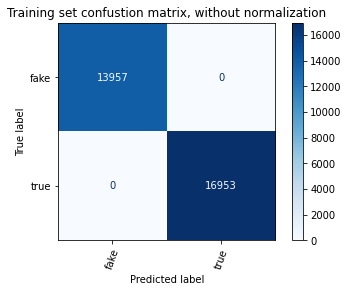

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


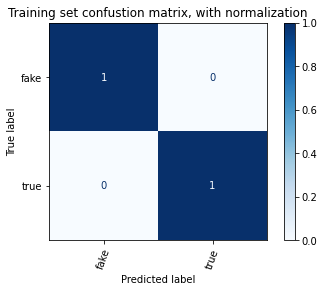

Classification report for Test set
              precision    recall  f1-score   support

        fake       0.94      0.93      0.93      3490
        true       0.94      0.95      0.95      4238

    accuracy                           0.94      7728
   macro avg       0.94      0.94      0.94      7728
weighted avg       0.94      0.94      0.94      7728



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


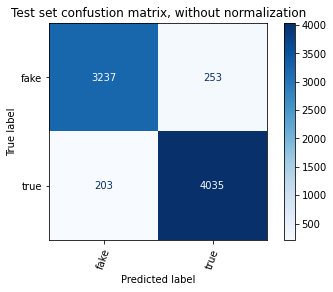

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


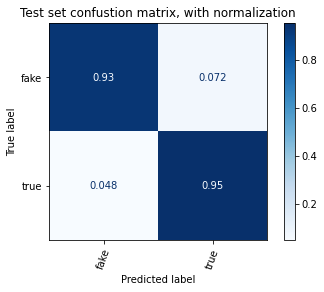

In [16]:
pipeline = train_and_eval_model(X_train = X_train['clean_title_tokens'], 
                                 X_test = X_test['clean_title_tokens'], 
                                 y_train_enc = y_train_enc, 
                                 y_test_enc = y_test_enc, 
                                 classes_ = le.classes_, 
                                 preprocessor = model_helperfunctions.passthrough, 
                                 tokenizer = model_helperfunctions.passthrough)

In [17]:
feature_importances = pd.DataFrame(pipeline['classifier'].feature_importances_, 
                                       index = pipeline['bow'].get_feature_names(), 
                                       columns = ['importance']).sort_values('importance', 
                                                                             ascending=False)
    
feature_importances.head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,importance
VIDEO,0.062623
the,0.036216
U.S.,0.030962
!,0.029166
video,0.027032
WATCH,0.022678
says,0.014721
is,0.014565
and,0.014378
just,0.013250


## title with stopwords removed

It can be observed that there are a lot of stopwords in the above model. We should take a look to see what the important features are with the stopwords removed.

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Classification report for Training set
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00     13957
        true       1.00      1.00      1.00     16953

    accuracy                           1.00     30910
   macro avg       1.00      1.00      1.00     30910
weighted avg       1.00      1.00      1.00     30910



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


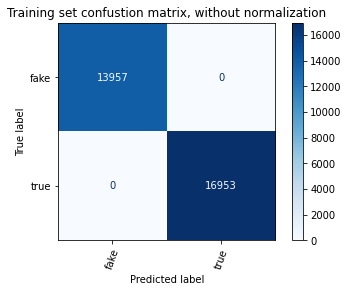

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


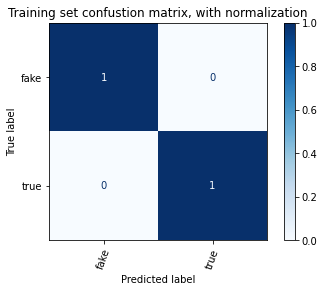

Classification report for Test set
              precision    recall  f1-score   support

        fake       0.94      0.90      0.92      3490
        true       0.92      0.96      0.94      4238

    accuracy                           0.93      7728
   macro avg       0.93      0.93      0.93      7728
weighted avg       0.93      0.93      0.93      7728



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


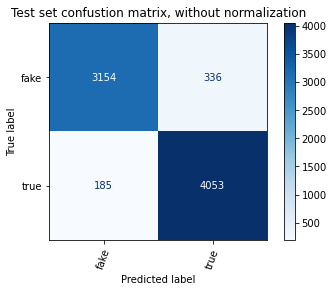

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


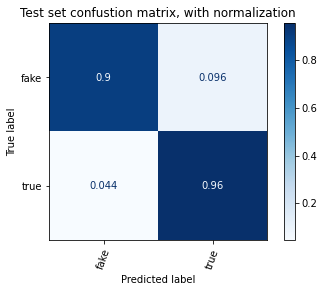

In [19]:
pipe_sw_removed = train_and_eval_model(X_train = X_train['clean_title_tokens'], 
                                 X_test = X_test['clean_title_tokens'], 
                                 y_train_enc = y_train_enc, 
                                 y_test_enc = y_test_enc, 
                                 classes_ = le.classes_, 
                                 preprocessor = model_helperfunctions.passthrough, 
                                 tokenizer = model_helperfunctions.remove_stopwords)

In [20]:
feat_imp_sw_removed = pd.DataFrame(pipe_sw_removed['classifier'].feature_importances_, 
                                       index = pipe_sw_removed['bow'].get_feature_names(), 
                                       columns = ['importance']).sort_values('importance', 
                                                                             ascending=False)
feat_imp_sw_removed.head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,importance
VIDEO,0.082567
video,0.034551
U.S.,0.034298
!,0.031124
WATCH,0.023127
says,0.019187
hillary,0.016034
GOP,0.014017
BREAKING,0.009561
TWEETS,0.009523


This model overfits a bit.  Before reducing this, we should try other combinations of text and title and check the results.

Looking at the important words, it seems referencing a video is the most important with 'VIDEO', 'video' and 'watch' being mentioned often.

## title with stopwords removed and all converted to lowercase

About half of the important features for the above model are uppercase words.  Let's take a look which are important when everything is lowercase.

Classification report for Training set
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00     13957
        true       1.00      1.00      1.00     16953

    accuracy                           1.00     30910
   macro avg       1.00      1.00      1.00     30910
weighted avg       1.00      1.00      1.00     30910



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


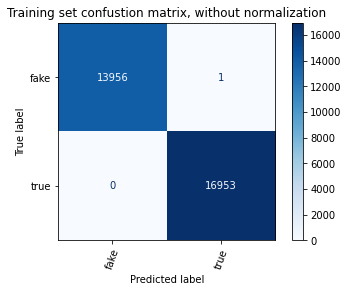

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


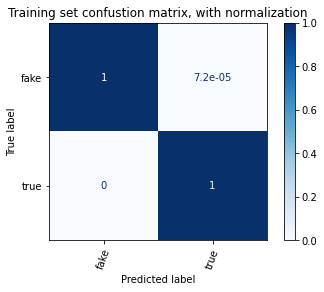

Classification report for Test set
              precision    recall  f1-score   support

        fake       0.93      0.90      0.92      3490
        true       0.92      0.95      0.93      4238

    accuracy                           0.93      7728
   macro avg       0.93      0.92      0.92      7728
weighted avg       0.93      0.93      0.93      7728



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


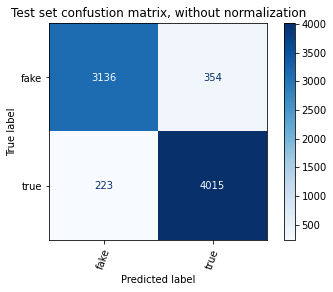

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


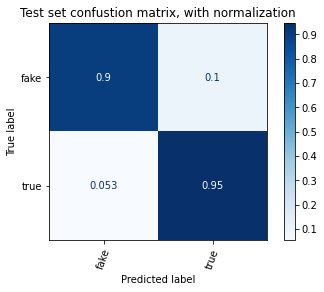

In [21]:
pipe_lc_sw_rm = train_and_eval_model(X_train = X_train['clean_title_tokens'], 
                     X_test = X_test['clean_title_tokens'], 
                     y_train_enc = y_train_enc, 
                     y_test_enc = y_test_enc, 
                     classes_ = le.classes_, 
                     preprocessor = model_helperfunctions.lowercase_tokens, 
                     tokenizer = model_helperfunctions.remove_stopwords)

In [22]:
feat_imp_lc_sw_rm = pd.DataFrame(pipe_lc_sw_rm['classifier'].feature_importances_, 
                                       index = pipe_lc_sw_rm['bow'].get_feature_names(), 
                                       columns = ['importance']).sort_values('importance', 
                                                                             ascending=False)
feat_imp_lc_sw_rm.head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,importance
video,0.111507
u.s.,0.035080
!,0.032135
watch,0.028169
hillary,0.021249
says,0.018711
gop,0.014781
trump,0.013219
breaking,0.010839
donald,0.009054


The list stayed about the same with the importance of video becoming a combination of 'VIDEO' and 'video'

## title with stopwords removed, all lowercase, n-gram range [1,2]

Classification report for Training set
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00     13957
        true       1.00      1.00      1.00     16953

    accuracy                           1.00     30910
   macro avg       1.00      1.00      1.00     30910
weighted avg       1.00      1.00      1.00     30910



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


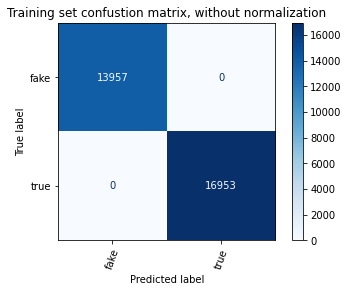

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


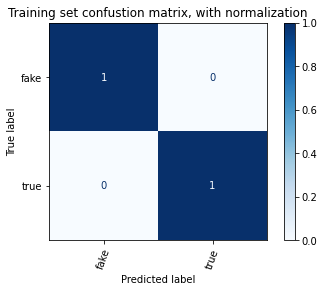

Classification report for Test set
              precision    recall  f1-score   support

        fake       0.93      0.90      0.92      3490
        true       0.92      0.95      0.93      4238

    accuracy                           0.93      7728
   macro avg       0.93      0.92      0.92      7728
weighted avg       0.93      0.93      0.93      7728



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


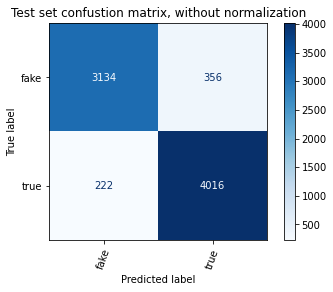

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


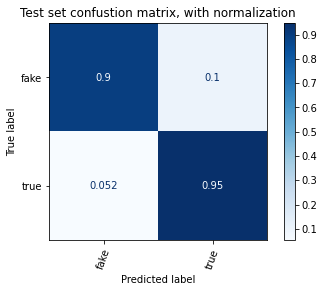

In [23]:
pipe_sw_rm_lc_ng = train_and_eval_model(X_train = X_train['clean_title_tokens'], 
                                         X_test = X_test['clean_title_tokens'], 
                                         y_train_enc = y_train_enc, 
                                         y_test_enc = y_test_enc, 
                                         classes_ = le.classes_, 
                                         preprocessor = model_helperfunctions.lowercase_and_remove_stopwords, 
                                         tokenizer = model_helperfunctions.passthrough, 
                                         ngram_range = (1, 2))

In [24]:
feat_imp_sw_rm_lc_ng = pd.DataFrame(pipe_sw_rm_lc_ng['classifier'].feature_importances_, 
                                       index = pipe_sw_rm_lc_ng['bow'].get_feature_names(), 
                                       columns = ['importance']).sort_values('importance', 
                                                                             ascending=False)
feat_imp_sw_rm_lc_ng.head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,importance
video,0.100158
u.s.,0.031169
!,0.027140
watch,0.023414
hillary,0.019088
says,0.015889
gop,0.014911
trump,0.011288
breaking,0.010870
tweets,0.008760


The only 2-word n-gram in the top 20 is 'donald trump'.  One class of stories seem to focus more on him or more on him using donald trump vs trump alone.

## title and text

In [25]:
X_train['title_and_text'] = X_train['clean_title_tokens'] + X_train['clean_text_tokens']
X_test['title_and_text'] = X_test['clean_title_tokens'] + X_test['clean_text_tokens']

Classification report for Training set
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00     13957
        true       1.00      1.00      1.00     16953

    accuracy                           1.00     30910
   macro avg       1.00      1.00      1.00     30910
weighted avg       1.00      1.00      1.00     30910



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


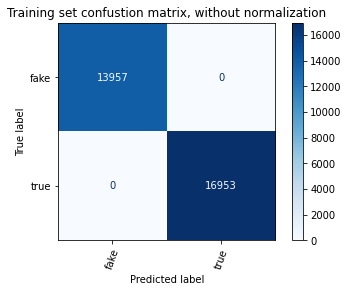

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


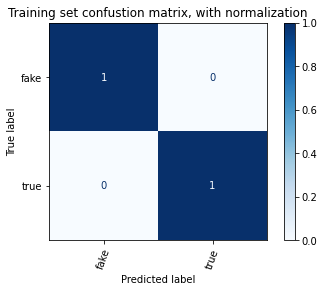

Classification report for Test set
              precision    recall  f1-score   support

        fake       0.99      0.97      0.98      3490
        true       0.97      0.99      0.98      4238

    accuracy                           0.98      7728
   macro avg       0.98      0.98      0.98      7728
weighted avg       0.98      0.98      0.98      7728



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


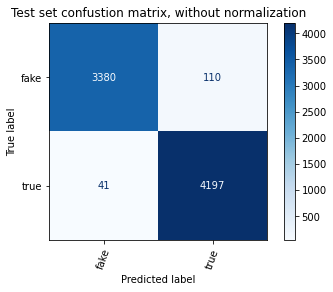

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


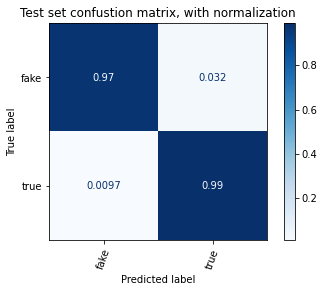

In [26]:
pipe_title_text = train_and_eval_model(X_train['title_and_text'], 
                                       X_test['title_and_text'],
                                       y_train_enc, 
                                       y_test_enc, 
                                       le.classes_, 
                                       model_helperfunctions.passthrough, 
                                       model_helperfunctions.passthrough)

In [27]:
feat_imp_title_text = pd.DataFrame(pipe_title_text['classifier'].feature_importances_, 
                                       index = pipe_title_text['bow'].get_feature_names(), 
                                       columns = ['importance']).sort_values('importance', 
                                                                             ascending=False)
feat_imp_title_text.head(30)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,importance
via,0.024121
said,0.021538
image,0.020453
U.S.,0.017692
WASHINGTON,0.014702
!,0.013742
video,0.012573
twitter-handle,0.010924
VIDEO,0.010697
just,0.010385


When looking at title and text combined, video is no longer as important as 'image', 'said' and 'twitter-handle'.  Those three words must be more prevalent in the news text vs the title, but even with all the additional information in the text, 'video' is still one of the top features.

## title and text - lowercase & lemmatize

The above feature list contains singular and plural versions of words as well as uppercase and lowercase words.  Let's see what the performance and feature importances are with all lowercase and lemmatization.

In [28]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Classification report for Training set
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00     13957
        true       1.00      1.00      1.00     16953

    accuracy                           1.00     30910
   macro avg       1.00      1.00      1.00     30910
weighted avg       1.00      1.00      1.00     30910



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


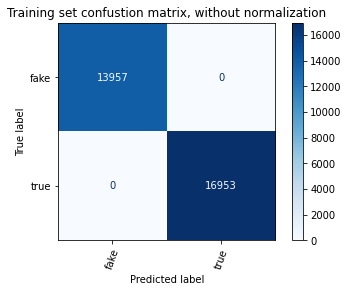

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


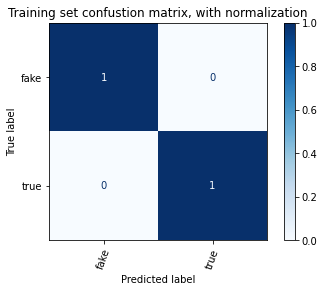

Classification report for Test set
              precision    recall  f1-score   support

        fake       0.98      0.96      0.97      3490
        true       0.97      0.99      0.98      4238

    accuracy                           0.97      7728
   macro avg       0.97      0.97      0.97      7728
weighted avg       0.97      0.97      0.97      7728



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


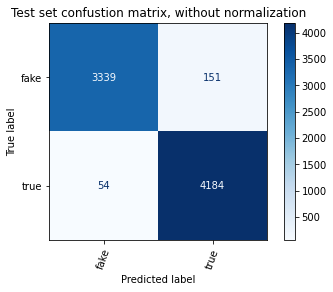

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


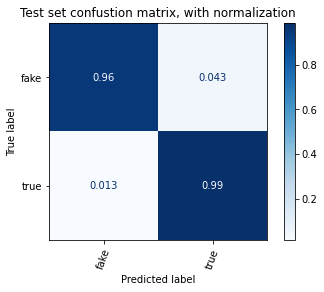

In [29]:
pipe_title_text_lc_lemma = train_and_eval_model(X_train['title_and_text'], 
                                       X_test['title_and_text'],
                                       y_train_enc, 
                                       y_test_enc, 
                                       le.classes_, 
                                       model_helperfunctions.lowercase_tokens, 
                                       model_helperfunctions.LemmaTokenizer())

In [30]:
feat_imp_title_text_lc_lemma = pd.DataFrame(pipe_title_text_lc_lemma['classifier'].feature_importances_, 
                                       index = pipe_title_text_lc_lemma['bow'].get_feature_names(), 
                                       columns = ['importance']).sort_values('importance', 
                                                                             ascending=False)
feat_imp_title_text_lc_lemma.head(30)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,importance
said,0.025232
via,0.022520
image,0.021251
video,0.018576
you,0.016539
!,0.013260
u.s.,0.012658
just,0.011812
twitter-handle,0.011308
washington,0.010772


Performing lemmatization has little change on the top features and actually reduces the accuracy by a little bit.

## title and text - lowercase, lemmatize & no stopwords

The list of important features from the above model contains a lot of stopwords.  Let's see what it looks like with the stopwords removed.

Classification report for Training set
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00     13957
        true       1.00      1.00      1.00     16953

    accuracy                           1.00     30910
   macro avg       1.00      1.00      1.00     30910
weighted avg       1.00      1.00      1.00     30910



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


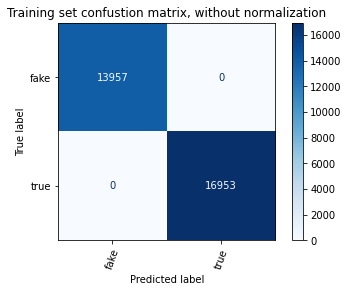

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


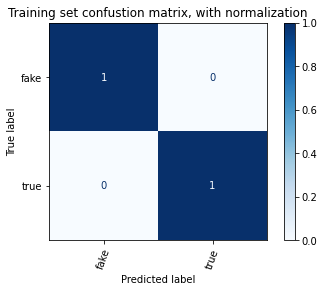

Classification report for Test set
              precision    recall  f1-score   support

        fake       0.98      0.96      0.97      3490
        true       0.97      0.99      0.98      4238

    accuracy                           0.98      7728
   macro avg       0.98      0.98      0.98      7728
weighted avg       0.98      0.98      0.98      7728



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


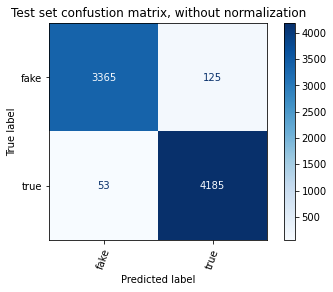

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


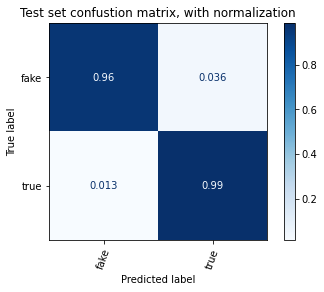

In [31]:
pipe_title_text_lc_lemma_no_sw = train_and_eval_model(X_train['title_and_text'], 
                                       X_test['title_and_text'],
                                       y_train_enc, 
                                       y_test_enc, 
                                       le.classes_, 
                                       model_helperfunctions.lowercase_and_remove_stopwords, 
                                       model_helperfunctions.LemmaTokenizer())

In [32]:
feat_imp_title_text_lc_lemma = pd.DataFrame(pipe_title_text_lc_lemma_no_sw['classifier'].feature_importances_, 
                                       index = pipe_title_text_lc_lemma_no_sw['bow'].get_feature_names(), 
                                       columns = ['importance']).sort_values('importance', 
                                                                             ascending=False)
feat_imp_title_text_lc_lemma.head(30)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,importance
via,0.037666
said,0.034584
video,0.024341
!,0.022970
image,0.016189
u.s.,0.015370
reuters,0.009066
washington,0.007603
twitter-handle,0.007530
minister,0.006782


Removing the stopwords increased the accuracy by 1 point but some words that may be more informative are now important features. 

## title & text - lowercase, lemmatize, no stopwords & n-gram range [1,2]

Classification report for Training set
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00     13957
        true       1.00      1.00      1.00     16953

    accuracy                           1.00     30910
   macro avg       1.00      1.00      1.00     30910
weighted avg       1.00      1.00      1.00     30910



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


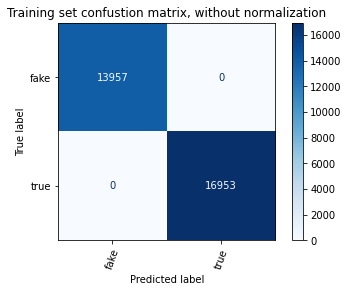

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


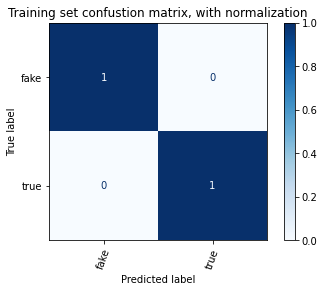

Classification report for Test set
              precision    recall  f1-score   support

        fake       0.98      0.97      0.98      3490
        true       0.97      0.99      0.98      4238

    accuracy                           0.98      7728
   macro avg       0.98      0.98      0.98      7728
weighted avg       0.98      0.98      0.98      7728



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


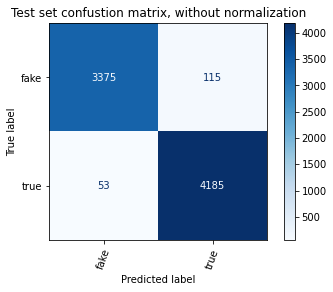

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


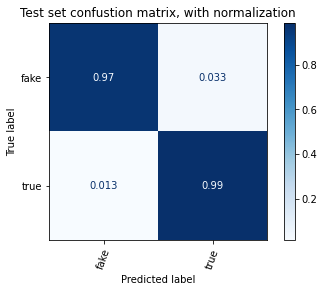

In [33]:
pipe_title_text_lc_lemma_no_sw_ng = train_and_eval_model(X_train['title_and_text'], 
                                                        X_test['title_and_text'],
                                                        y_train_enc, 
                                                        y_test_enc, 
                                                        le.classes_, 
                                                        model_helperfunctions.lowercase_and_remove_stopwords, 
                                                        model_helperfunctions.LemmaTokenizer(), 
                                                        ngram_range = (1, 2))

In [34]:
feat_imp_title_text_lc_lemma_no_sw_ng = pd.DataFrame(pipe_title_text_lc_lemma_no_sw_ng['classifier'].feature_importances_, 
                                       index = pipe_title_text_lc_lemma_no_sw_ng['bow'].get_feature_names(), 
                                       columns = ['importance']).sort_values('importance', 
                                                                             ascending=False)
feat_imp_title_text_lc_lemma_no_sw_ng.head(30)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,importance
said,0.018068
image,0.016164
video,0.014300
u.s.,0.013522
via,0.013011
!,0.011567
like,0.009288
image via,0.008329
washington,0.006408
link,0.006153


The above result threw us off course for a bit. We had to check why the letter *u* became an important feature here. During the course of our research, we learnt that *us*, could have been *us* without any change or *US* (the country), which got lemmatized to *u*. 

[Further reading](https://stackoverflow.com/questions/54784287/nltk-wordnetlemmatizer-processes-us-as-u)

There are quite a few 2-word n-grams that pop up as important features, but the accuracy and F1 scores remain similar.

## title & text - lowercase, only stopwords

We would like to strip out all the named entities / jargon so that the model is less time/event dependent while also trying to find stylistic differences between the classes. We attempted to use Named Entity Recognition (NER) to do the same, but this proved to be too computationally expensive (14 hours+ running time on Google Colab and still doesn't finish).  

However, as an alternative, we can consider looking at only the stopwords. This will remove all the entities and jargon, but will likely lose some helpful information to use with the classification as well.

In [35]:
def lowercase_and_only_stopwords(doc):
    # Removes stopwords and lowercase tokens.
    stop_words = stopwords.words('english')
    return [token.lower() for token in doc if token.lower() in stop_words]

Classification report for Training set
              precision    recall  f1-score   support

        fake       1.00      1.00      1.00     13957
        true       1.00      1.00      1.00     16953

    accuracy                           1.00     30910
   macro avg       1.00      1.00      1.00     30910
weighted avg       1.00      1.00      1.00     30910



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


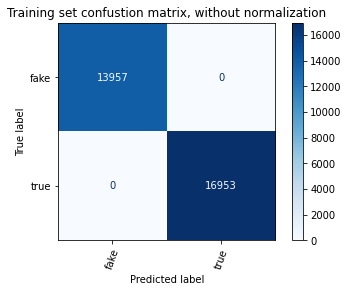

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


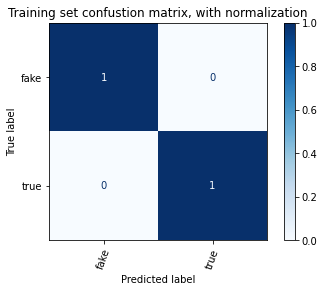

Classification report for Test set
              precision    recall  f1-score   support

        fake       0.90      0.86      0.88      3490
        true       0.89      0.92      0.91      4238

    accuracy                           0.90      7728
   macro avg       0.90      0.89      0.89      7728
weighted avg       0.90      0.90      0.90      7728



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


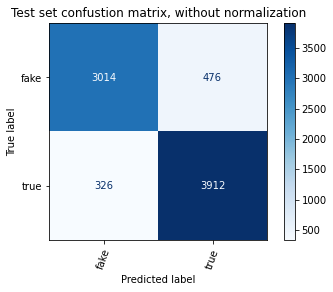

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


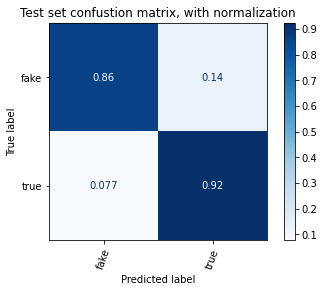

In [36]:
pipe_title_text_lc_only_sw = train_and_eval_model(X_train['title_and_text'], 
                                                        X_test['title_and_text'],
                                                        y_train_enc, 
                                                        y_test_enc, 
                                                        le.classes_, 
                                                        lowercase_and_only_stopwords, 
                                                        model_helperfunctions.passthrough)

In [37]:
feat_imp_title_text_lc_only_sw = pd.DataFrame(pipe_title_text_lc_only_sw['classifier'].feature_importances_, 
                                       index = pipe_title_text_lc_only_sw['bow'].get_feature_names(), 
                                       columns = ['importance']).sort_values('importance', 
                                                                             ascending=False)
feat_imp_title_text_lc_only_sw.head(30)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,importance
you,0.067330
on,0.066839
just,0.048365
in,0.036670
this,0.033570
its,0.033525
here,0.033019
the,0.026587
is,0.025476
what,0.024160


The model is starting to overfit.  We need to reduce the same.

Regardless, it is interesting that the data can be stripped to only stopwords and still have F1 scores around 0.9 and an accuracy of 0.9.

### Reduce overfitting



#### Set the mininum sample split to 10%

Althought this seems a bit high, but we wish to see how far the f1 and accuracy scores go down.

Classification report for Training set
              precision    recall  f1-score   support

        fake       0.82      0.83      0.82     13957
        true       0.86      0.85      0.85     16953

    accuracy                           0.84     30910
   macro avg       0.84      0.84      0.84     30910
weighted avg       0.84      0.84      0.84     30910



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


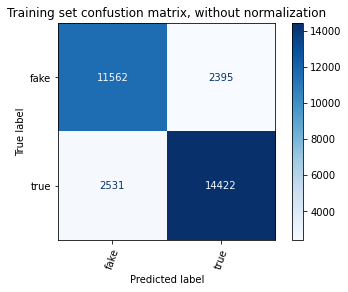

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


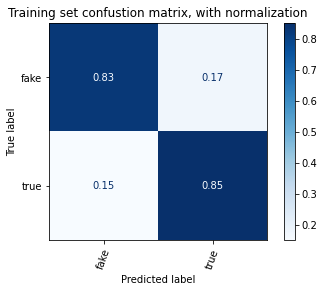

Classification report for Test set
              precision    recall  f1-score   support

        fake       0.82      0.82      0.82      3490
        true       0.85      0.85      0.85      4238

    accuracy                           0.84      7728
   macro avg       0.84      0.84      0.84      7728
weighted avg       0.84      0.84      0.84      7728



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


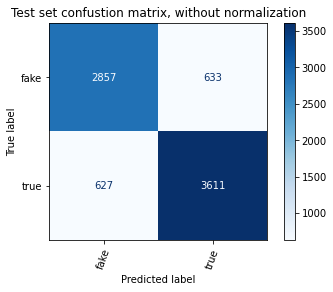

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


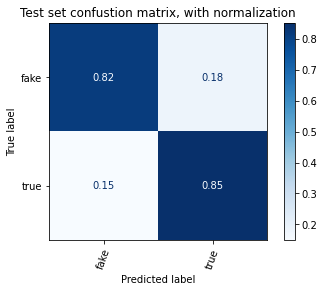

In [38]:
pipe_title_text_lc_only_sw_mdf = train_and_eval_model(X_train['title_and_text'], 
                                                        X_test['title_and_text'],
                                                        y_train_enc, 
                                                        y_test_enc, 
                                                        le.classes_, 
                                                        lowercase_and_only_stopwords, 
                                                        model_helperfunctions.passthrough,
                                                 min_samples_split = 0.1)

In [39]:
feat_imp_title_text_lc_only_sw_mdf = pd.DataFrame(pipe_title_text_lc_only_sw_mdf['classifier'].feature_importances_, 
                                       index = pipe_title_text_lc_only_sw_mdf['bow'].get_feature_names(), 
                                       columns = ['importance']).sort_values('importance', 
                                                                             ascending=False)
feat_imp_title_text_lc_only_sw_mdf.head(30)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,importance
you,0.146927
just,0.087825
here,0.077120
on,0.070555
its,0.060949
what,0.060926
this,0.054531
so,0.054513
is,0.035802
didn,0.030872


The f1 and accuracy scores went down by about 0.05 each, but the model no longer overfits.

#### Grid Search

Now, we'll try a grid search on the minimum samples split parameter to see if we can improve the scores while maintaining the fitness of the model.

In [40]:
param_grid = {'classifier__min_samples_split': [0.005, 0.01, 0.05, 0.1]}

In [44]:
def train_and_eval_grid_search(X_train, X_test, y_train_enc, y_test_enc, classes_,
                        preprocessor, tokenizer, max_df=1.0, ngram_range = (1, 1)):
                               
    pipeline = Pipeline([
                        ('bow',CountVectorizer(min_df = 5, 
                                               preprocessor = preprocessor, 
                                               tokenizer = tokenizer, 
                                               max_df = max_df, 
                                               ngram_range = ngram_range)),  
                        ('classifier', RandomForestClassifier(n_jobs = 1, 
                                                              random_state = RANDOM_STATE)),
                        ])

    gs = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=1)

    gs.fit(X_train,y_train_enc)

    model_helperfunctions.confustion_matrix_and_classification_report(gs.best_estimator_, 
                                                X_train, 
                                                y_train_enc, 
                                                classes_, 
                                               'Training')

    model_helperfunctions.confustion_matrix_and_classification_report(gs.best_estimator_, 
                                                X_test, 
                                                y_test_enc, 
                                                classes_,
                                                'Test')




    return gs

Classification report for Training set
              precision    recall  f1-score   support

        fake       0.91      0.89      0.90     13957
        true       0.91      0.92      0.92     16953

    accuracy                           0.91     30910
   macro avg       0.91      0.91      0.91     30910
weighted avg       0.91      0.91      0.91     30910



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


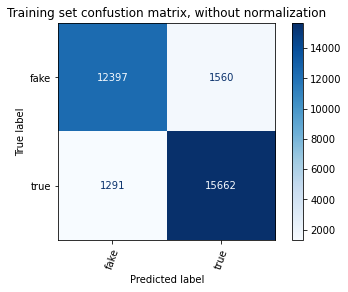

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


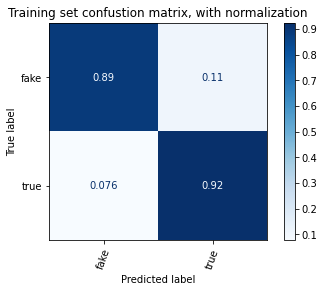

Classification report for Test set
              precision    recall  f1-score   support

        fake       0.88      0.86      0.87      3490
        true       0.89      0.91      0.90      4238

    accuracy                           0.89      7728
   macro avg       0.89      0.88      0.88      7728
weighted avg       0.89      0.89      0.89      7728



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


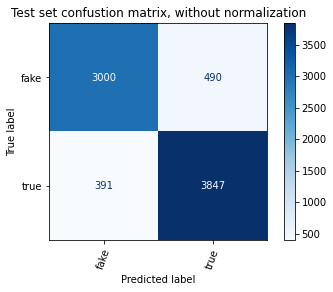

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


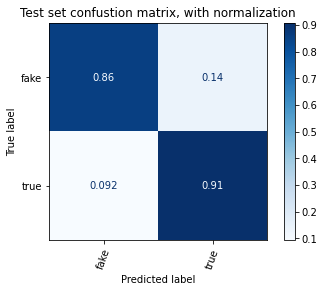

In [45]:
gs = train_and_eval_grid_search(X_train['title_and_text'], 
                                                        X_test['title_and_text'],
                                                        y_train_enc, 
                                                        y_test_enc, 
                                                        le.classes_, 
                                                        lowercase_and_only_stopwords,
                                                        model_helperfunctions.passthrough)

In [46]:
gs.best_params_

{'classifier__min_samples_split': 0.005}

In [47]:
feat_imp_gs = pd.DataFrame(gs.best_estimator_['classifier'].feature_importances_, 
                                       index = gs.best_estimator_['bow'].get_feature_names(), 
                                       columns = ['importance']).sort_values('importance', 
                                                                             ascending=False)
feat_imp_gs.head(30)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,importance
you,0.116871
on,0.096164
just,0.075585
here,0.058961
its,0.054028
this,0.048278
in,0.041838
what,0.041145
so,0.033018
is,0.030135


After doing a grid search, we were able to get a test set accuracy of 0.89 and macro average f1 score of 0.87.  This is pretty good for such a small set of words. It should generalize well too.

## title & text only - lowercase, only stopwords, but a larger set of them.

Here, we check if we can improve the model performance by increasing the size of the set of stopwords.

We'll use the best 'min_samples_split' value from the above model for the same.

In [48]:
#Using the expanded stopwords list from https://gist.github.com/sebleier/554280

gist_file = open(DATA_PATH + "gist_stopwords.txt", "r")
try:
    content = gist_file.read()
    expanded_stopwords = content.split(",")
finally:
    gist_file.close()

In [49]:
def lowercase_and_only_expanded_stopwords(doc):
    # Remove stopwords and lowercase tokens.
    stop_words = expanded_stopwords
    return [token.lower() for token in doc if token.lower() in stop_words]

Classification report for Training set
              precision    recall  f1-score   support

        fake       0.97      0.95      0.96     13957
        true       0.96      0.98      0.97     16953

    accuracy                           0.97     30910
   macro avg       0.97      0.96      0.96     30910
weighted avg       0.97      0.97      0.97     30910



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


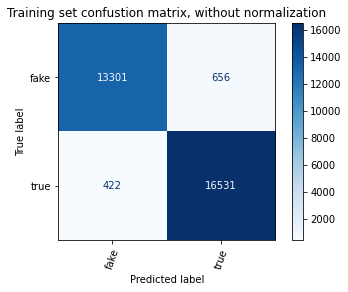

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


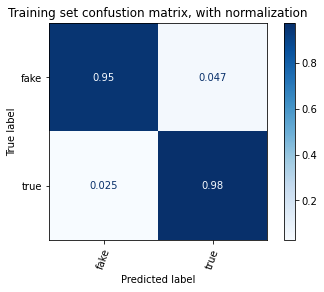

Classification report for Test set
              precision    recall  f1-score   support

        fake       0.95      0.93      0.94      3490
        true       0.94      0.96      0.95      4238

    accuracy                           0.95      7728
   macro avg       0.95      0.95      0.95      7728
weighted avg       0.95      0.95      0.95      7728



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


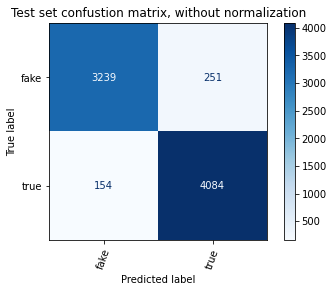

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


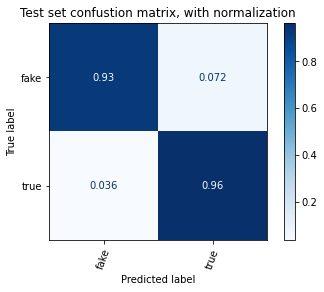

In [50]:
pipe_expanded_sw = train_and_eval_model(X_train['title_and_text'], 
                                                        X_test['title_and_text'],
                                                        y_train_enc, 
                                                        y_test_enc, 
                                                        le.classes_, 
                                                        lowercase_and_only_expanded_stopwords, 
                                                        model_helperfunctions.passthrough,
                                                 min_samples_split = 0.005)

In [51]:
feat_imp_expanded_sw = pd.DataFrame(pipe_expanded_sw['classifier'].feature_importances_, 
                                       index = pipe_expanded_sw['bow'].get_feature_names(), 
                                       columns = ['importance']).sort_values('importance', 
                                                                             ascending=False)
feat_imp_expanded_sw.head(30)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,importance
said,0.142747
via,0.103584
you,0.052624
on,0.045241
just,0.034795
this,0.031183
its,0.027464
like,0.023683
why,0.020868
here,0.020192


Using the expanded stopword list increased the f1 and accuracy scores for the test set, while not overfitting the model to particular people, events, organizations or hashtags.  Although these are news stories, many of them quote tweets which would contain hashtags.

Now, speaking of referencing, it can be assumed "said" and "on" are sort of proxies for Twitter (i.e. X  **said** Y **on** Twitter).

'via' also seems like it would have a high probability of referencing a website.

After performing some EDA on "said", "via" and "on", "said" and "on" tend to be True, but wouldn't be very indicative on their own, while "via" when used in the phrase "image via" is exclusively Fake.  

However, "image" is not in this set of stopwords and so "via" is on its own, and in that case only tends to be Fake, but would not be very indicative on its own.

### Remove "via" from the expanded stopwords list

"via" having a high feature importance seems like it may be particular to this dataset and may not generalize well.  There are significant amount of fake news stories that end with "image via".  We'd like so check how the model does when "via" is removed from the expanded stopwords list.

In [52]:
expanded_stopwords.remove('via')

Classification report for Training set
              precision    recall  f1-score   support

        fake       0.96      0.95      0.95     13957
        true       0.96      0.97      0.96     16953

    accuracy                           0.96     30910
   macro avg       0.96      0.96      0.96     30910
weighted avg       0.96      0.96      0.96     30910



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


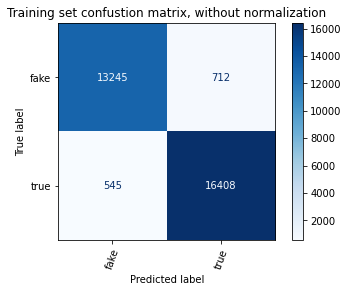

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


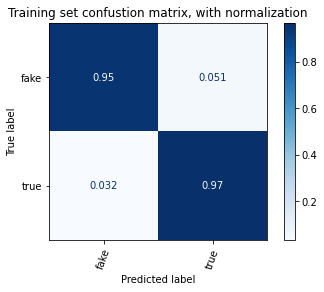

Classification report for Test set
              precision    recall  f1-score   support

        fake       0.95      0.92      0.93      3490
        true       0.93      0.96      0.94      4238

    accuracy                           0.94      7728
   macro avg       0.94      0.94      0.94      7728
weighted avg       0.94      0.94      0.94      7728



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


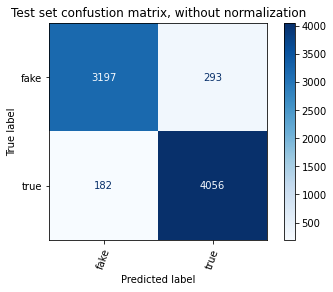

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


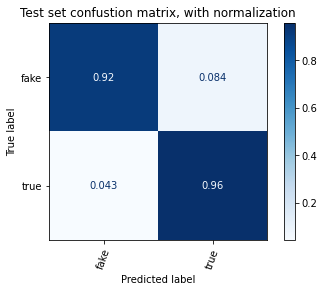

In [53]:
pipe_expanded_sw_no_via = train_and_eval_model(X_train['title_and_text'], 
                                                        X_test['title_and_text'],
                                                        y_train_enc, 
                                                        y_test_enc, 
                                                        le.classes_, 
                                                        lowercase_and_only_expanded_stopwords, 
                                                        model_helperfunctions.passthrough,
                                                 min_samples_split = 0.005)

In [54]:
feat_imp_expanded_sw_no_via = pd.DataFrame(pipe_expanded_sw_no_via['classifier'].feature_importances_, 
                                       index = pipe_expanded_sw_no_via['bow'].get_feature_names(), 
                                       columns = ['importance']).sort_values('importance', 
                                                                             ascending=False)
feat_imp_expanded_sw_no_via.head(30)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,importance
said,0.161958
you,0.049972
just,0.047717
on,0.044588
here,0.033179
this,0.030938
is,0.022496
its,0.021651
like,0.019380
in,0.018826


---
# **Summary**

The model using just the list of expanded stopwords on title and text is the best model out of all the ones in this notebook.  It doesn't have the highest accuracy and f1 scores but they are still at 0.93 and using a limited set of words should create a more generalizable model.

This model also does slightly better the the naive bayes model on accuracy and f1 scores when using this same stopwords only dataset.